In [1]:
import numpy as np  
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 
from sklearn.neighbors import NearestNeighbors 
from sklearn.preprocessing import normalize 

In [2]:
import os 
import numpy as np 
     
# set names to the paths because they're too long 
data_path = 'D:\\Python\\MachineLearning\\MachineLearning\\project\\data\\handwritting' 
# train path 
train_images_path = os.path.join(data_path, 'train-images-idx3-ubyte.gz') 
train_labels_path = os.path.join(data_path, 'train-labels-idx1-ubyte.gz') 
# test path 
test_images_path = os.path.join(data_path, 't10k-images-idx3-ubyte.gz') 
test_labels_path = os.path.join(data_path, 't10k-labels-idx1-ubyte.gz')

In [3]:
def get_mnist_data(images_path, labels_path, num_images 
                   , shuffle=False, _is=True, image_size=28): 
    """ 
        This shuffle param is active when .gz is downloaded at: 
            - 'http://yann.lecun.com/exdb/mnist/' 
            - This function return random num_images in 60000 or 10000   
    """ 
    # read data 
    import gzip           # to decompress gz (zip) file 
 
    # open file training to read training data 
    f_images = gzip.open(images_path,'r') 
     
    # skip 16 first bytes because these are not data, only header infor 
    f_images.read(16) 
     
    # general: read num_images data samples if this parameter is set; 
    # if not, read all (60000 training or 10000 test) 
    real_num = num_images if not shuffle else (60000 if _is else 10000) 
 
    # read all data to buf_images (28x28xreal_num) 
    buf_images = f_images.read(image_size * image_size * real_num) 
     
    # images 
    images = np.frombuffer(buf_images, dtype=np.uint8).astype(np.float32) 
    images = images.reshape(real_num, image_size, image_size,) 
     
    # Read labels    
    f_labels = gzip.open(labels_path,'r') 
    f_labels.read(8) 
     
    labels = np.zeros((real_num)).astype(np.int64) 
     
    # rearrange to correspond the images and labels 
    for i in range(0, real_num):    
        buf_labels = f_labels.read(1) 
        labels[i] = np.frombuffer(buf_labels, dtype=np.uint8).astype(np.int64)
     # shuffle to get random images data 
    if shuffle is True: 
        rand_id = np.random.randint(real_num, size=num_images) 
         
        images = images[rand_id, :] 
        labels = labels[rand_id,] 
     
    # change images data to type of vector 28x28 dimentional 
    images = images.reshape(num_images, image_size * image_size) 
    return images, labels 

In [4]:
train_images, train_labels = get_mnist_data(train_images_path, train_labels_path, 5000, shuffle=True) 
 
test_images, test_labels = get_mnist_data(test_images_path, test_labels_path, 1000, _is=False, shuffle=True) 
 
print(train_images.shape, train_labels.shape) 
print(test_images.shape, test_labels.shape) 

C:\Users\FPT SHOP\AppData\Local\Temp\ipykernel_16740\151967751.py:37: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  labels[i] = np.frombuffer(buf_labels, dtype=np.uint8).astype(np.int64)


(5000, 784) (5000,)
(1000, 784) (1000,)


Xây dựng phương thức để hiện thị dữ liệu: 

In [10]:
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib 
 
def display_network(A, m = -1, n = -1): 
    opt_normalize = True 
    opt_graycolor = True 
 
    # Rescale 
    A = A - np.average(A) 
 
    # Compute rows & cols 
    (row, col) = A.shape 
    sz = int(np.ceil(np.sqrt(row))) 
    buf = 1 
    if m < 0 or n < 0: 
        n = int(np.ceil(np.sqrt(col))) 
        m = int(np.ceil(col / n)) 
         
    # Initialize image with buffer
    image = np.ones(shape=(buf + m * (sz + buf), buf + n * (sz + buf))) 
 
    if not opt_graycolor: 
        image *= 0.1 
 
    k = 0 
 
    for i in range(int(m)): 
        for j in range(int(n)): 
            if k >= col: 
                continue 
 
            clim = np.max(np.abs(A[:, k])) 
 
            if opt_normalize: 
                image[buf + i * (sz + buf):buf + i * (sz + buf) + sz, buf + j * (sz + buf):buf + j * (sz + buf) + sz] = \
                    A[:, k].reshape(sz, sz) / clim
            else: 
                image[buf + i * (sz + buf):buf + i * (sz + buf) + sz, buf + j * (sz + buf):buf + j * (sz + buf) + sz] = \
                    A[:, k].reshape(sz, sz) / np.max(np.abs(A))
            
            k += 1
 
    return image


In [11]:
def display_color_network(A): 
    """ 
    # display receptive field(s) or basis vector(s) for image patches 
    # 
    # A         the basis, with patches as column vectors 
    # In case the midpoint is not set at 0, we shift it dynamically 
    :param A: 
    :param file: 
    :return: 
    """ 
    if np.min(A) >= 0: 
        A = A - np.mean(A) 
 
    cols = np.round(np.sqrt(A.shape[1])) 
 
    channel_size = A.shape[0] / 3 
    dim = np.sqrt(channel_size) 
    dimp = dim + 1 
    rows = np.ceil(A.shape[1] / cols) 
 
    B = A[0:channel_size, :] 
    C = A[channel_size:2 * channel_size, :] 
    D = A[2 * channel_size:3 * channel_size, :] 
 
    B = B / np.max(np.abs(B)) 
    C = C / np.max(np.abs(C)) 
    D = D / np.max(np.abs(D)) 
 
    # Initialization of the image 
    image = np.ones(shape=(dim * rows + rows - 1, dim * cols + cols - 1, 3)) 
 
    for i in range(int(rows)): 
        for j in range(int(cols)): 
            # This sets the patch 
            image[i * dimp:i * dimp + dim, j * dimp:j * dimp + dim, 0] = B[:, i * cols + j].reshape(dim, dim) 
            image[i * dimp:i * dimp + dim, j * dimp:j * dimp + dim, 1] = C[:, i * cols + j].reshape(dim, dim) 
            image[i * dimp:i * dimp + dim, j * dimp:j * dimp + dim, 2] = D[:, i * cols + j].reshape(dim, dim) 
 
    image = (image + 1) / 2 
 
    return image 

Chạy k-means cho 1000 mẫu dữ liệu đầu tiên 

In [12]:
X = test_images 
X0 = np.asarray(X)[:1000,:]/256.0 
X = X0 
 
K = 10 
kmeans = KMeans(n_clusters=K).fit(X) 
 
pred_label = kmeans.predict(X) 

Chọn hiển thị một số ảnh thuộc một số cụm 

<class 'numpy.ndarray'>
(784, 10)


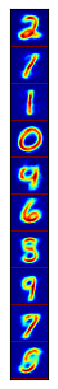

In [13]:
print(type(kmeans.cluster_centers_.T)) 
print(kmeans.cluster_centers_.T.shape) 
A = display_network(kmeans.cluster_centers_.T, K, 1) 
 
f1 = plt.imshow(A, interpolation='nearest', cmap = "jet") 
f1.axes.get_xaxis().set_visible(False) 
f1.axes.get_yaxis().set_visible(False) 
plt.show() 
# plt.savefig('a1.png', bbox_inches='tight') 
 
 
# a colormap and a normalization instance 
cmap = plt.cm.jet 
norm = plt.Normalize(vmin=A.min(), vmax=A.max()) 
 
# map the normalized data to colors 
# image is now RGBA (512x512x4)  
image = cmap(norm(A)) 
# import scipy.misc 
# scipy.misc.imsave('aa.png', image) 

In [17]:
N0 = 20; 
X1 = np.zeros((N0*K, 784)) 
X2 = np.zeros((N0*K, 784)) 
 
for k in range(K): 
    Xk = X0[pred_label == k, :] 
 
    center_k = [kmeans.cluster_centers_[k]] 
    neigh = NearestNeighbors(n_neighbors=N0).fit(Xk) 
    dist, nearest_id  = neigh.kneighbors(center_k, N0) 
     
    X1[N0*k: N0*k + N0,:] = Xk[nearest_id, :] 
    X2[N0*k: N0*k + N0,:] = Xk[:N0, :] 

In [18]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors

# Assuming K and X0 are defined elsewhere
N0 = 20  # Number of nearest neighbors to find
X1 = np.zeros((N0 * K, 784))  # Assuming a 784-dimensional feature space
X2 = np.zeros((N0 * K, 784))

for k in range(K): 
    Xk = X0[pred_label == k, :]  # Assuming pred_label is defined elsewhere
    
    # Get the center of the k-th cluster
    center_k = [kmeans.cluster_centers_[k]]
    
    # Find the N0 nearest neighbors from Xk to center_k
    neigh = NearestNeighbors(n_neighbors=N0).fit(Xk)  # Corrected keyword argument
    dist, nearest_id = neigh.kneighbors(center_k)  # Get nearest neighbors
    
    # Store the nearest neighbors in X1
    X1[N0 * k: N0 * k + N0, :] = Xk[nearest_id[0], :]  # Corrected indexing
    
    # Store the first N0 elements in X2
    X2[N0 * k: N0 * k + N0, :] = Xk[:N0, :]


Hiển thị kết quả 

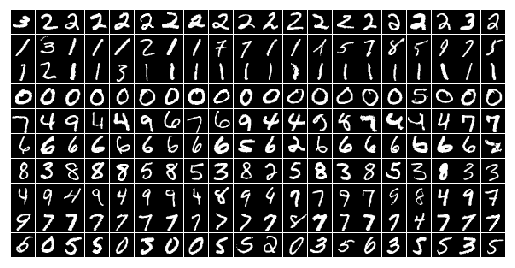

In [19]:
plt.axis('off') 
A = display_network(X2.T, K, N0) 
f2 = plt.imshow(A, interpolation='nearest' ) 
plt.gray() 
plt.show()